3cos(3x) +7.1sin(2x) +0.3sin(x) -3 


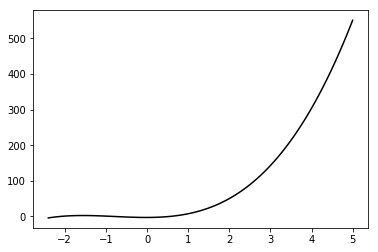

-1cos(3x) -4.1sin(2x) +0.7sin(x) +5 

In [92]:
#question 1
import numpy as nm
import matplotlib as mpl
import matplotlib.pyplot as plt


class polynomial(object):
    def __init__(self, c, v='x'):
        self.coeff = c
        self.v = v
    def __repr__(self):
        coeff = self.coeff
        v = self.v
        s = ''
        D = len(coeff)
        
        first = True
        
        for i in range(D):
            pw = D-i-1
            pre = '+' if coeff[i]>0 else ''

            if first:
                if pre=='+':
                    pre = ''
                first = False
            
            if pw == 0:
                vname = ''
            elif pw == 1:
                vname = 'sin(' + v + ')'
            elif pw == D-1:
                vname = 'cos(' + str(D-1) + v + ')'
            else:
                vname = 'sin(' + str(pw) + '' + v + ')'

            if coeff[i] != 0:
                s += pre+str(coeff[i])+ vname + ' '
               
        return s
    def __add__(self,b):
        L_a = len(self.coeff)
        L_b = len(b.coeff)
        
        coeff = self.coeff if L_a > L_b else b.coeff
        short = self.coeff if L_a <= L_b else b.coeff
        
        for i in range(len(short)):
            coeff[-1-i] += short[-1-i]
            
        return polynomial(coeff, self.v)
    
    def __sub__(self,b):
        L_a = len(self.coeff)
        L_b = len(b.coeff)
        
        coeff = self.coeff if L_a > L_b else b.coeff
        short = self.coeff if L_a <= L_b else b.coeff
        
        for i in range(len(short)):
            coeff[-1-i] -= short[-1-i]
            
        return polynomial(coeff, self.v)
    def __mul__(self,b):
        """Computes a*b and returns the result"""
        coeff = np.polymul(self.coeff, b.coeff)
        return polynomial(coeff,self.v)
    def deriv(self):
        coeff = []
        D = len(self.coeff)
        for i in range(D-1):
            pw = D-i-1
            coeff.append(pw*self.coeff[i])
        
        if coeff == []:
            coeff = [0]
        
        return polynomial(coeff, self.v)
        
    def plot(self, number_of_points=100, left=-1, right=1):
        """
            Evaluates the polynomial at number_of_points equally spaced 
            points between left and right and plots the result using matplotlib
        """
        x = np.linspace(left,right,number_of_points)
        y = np.polyval(self.coeff, x)
        plt.plot(x, y, 'k')
        plt.show()
        
        return

p = polynomial([3, 7.1, 0.3, -3], 'x')
q = polynomial([2, 3, 1, 2], 'x')
print(p)
p.plot(left=-2.4, right=5)
p-q


In [72]:
#question 2
class myobj:
    def __init__(self, name):
        self.dependencies = []
        self.name = name

    def add_dependency(self, *myobj):
        self.dependencies.extend(myobj)

    def build(self, names=None):
        if names is None:
            names = []

        for i in self.dependencies:
            if i.name not in names:
                i.build(names)
                names.append(i.name)

        return names

    def __str__(self):
        return self.name
    
luke    = myobj("Luke")
hansolo = myobj("Han Solo")
leia    = myobj("Leia")
yoda    = myobj("Yoda")
padme   = myobj("Padme Amidala")
anakin  = myobj("Anakin Skywalker")
obi     = myobj("Obi-Wan")
darth   = myobj("Darth Vader")
_all    = myobj("All")


luke.add_dependency(hansolo, leia, yoda)
leia.add_dependency(padme, anakin)
obi.add_dependency(yoda)
darth.add_dependency(anakin)

_all.add_dependency(luke, hansolo, leia, yoda, padme, anakin, obi, darth)
_all.build()

['Han Solo',
 'Padme Amidala',
 'Anakin Skywalker',
 'Leia',
 'Yoda',
 'Luke',
 'Obi-Wan',
 'Darth Vader']